In [104]:
#module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
from sklearn.metrics import mean_squared_error

In [105]:
train_for_k_days = 7
predict_for_k_days = 14

In [106]:
data_country = np.load('TopCountriesData.npy')
c_values = np.load('c_values.npy')
meta_params = np.array([[10000,1],[10000,1],[10000,1]])

In [107]:
dataframe = pd.read_csv('out.csv',header=None)
data = dataframe.values
meta_data = data[:,:7]

In [108]:
print(meta_data.shape, c_values.shape)

(325, 7) (3, 325)


In [109]:
sample_y = data_country[4][52:59]
print(sample_y, sample_y.shape)

[6.32192809 6.71424552 7.47573343 7.53915881 7.79441587 8.01122726
 8.27146303] (7,)


In [110]:
def meta_predictor(x_train,x_test,c,w_1,w_2):
    output=0
    for i in range(x_train.shape[0]):
        #print(c[i],meta_kernel_formula(x_train[i],x_test,w_1,w_2),c[i]*meta_kernel_formula(x_train[i],x_test,w_1,w_2))
        output+=c[i]*meta_kernel_formula(x_train[i],x_test,w_1,w_2)
    return output

def meta_kernel_formula(x_i,x_j,w_1,w_2):
    temp = np.square(np.linalg.norm(x_i-x_j))
    return w_1*np.exp(-w_2*temp)

In [111]:
pred_w1 = meta_predictor(meta_data,sample_y,c_values[0],meta_params[0][0],meta_params[0][1])
pred_w1

1.8554225883364055

In [112]:
pred_w1 = meta_predictor(meta_data,sample_y,c_values[0],meta_params[0][0],meta_params[0][1])
pred_w2 = meta_predictor(meta_data,sample_y,c_values[1],meta_params[1][0],meta_params[1][1])
pred_w3 = meta_predictor(meta_data,sample_y,c_values[2],meta_params[2][0],meta_params[2][1])

In [113]:
print(pred_w1,pred_w2,pred_w3)

1.8554225883364055 19.052306779724358 0.0033755061285508747


In [90]:
meta_data.shape

(325, 7)

In [91]:
#do not touch this function
def kernel_formula(x_i,x_j,w_1,w_2,w_3):
    return np.power(x_i*x_j,w_1)+w_2*np.exp(-w_3*np.square(x_i-x_j))

def kernel_matrix_generator(x,w_1,w_2,w_3):
    kernel_matrix = np.zeros(shape=(x.shape[0],x.shape[0]))
    i=0
    for x_i in x:
        j=0
        for x_j in x:
            kernel_matrix[i,j] = kernel_formula(x_i,x_j,w_1,w_2,w_3)
            j+=1
        i+=1
    return kernel_matrix

#do not touch this function
def solver(x,y,gamma,w_1,w_2,w_3):
    kernel_matrix = kernel_matrix_generator(x,w_1,w_2,w_3)
    A = gamma*(kernel_matrix.shape[0])*np.identity(kernel_matrix.shape[0])
    A = np.add(A,kernel_matrix)
    B=y
    c = np.linalg.solve(A,B)
    return c

#do not touch this function
def predictor(x_train,x_test,y_train,gamma,w_1,w_2,w_3):
    c = solver(x_train,y_train,gamma,w_1,w_2,w_3)
    output = np.zeros(shape=(x_test.shape[0]))
    for j in range(x_test.shape[0]):
        for i in range(x_train.shape[0]):
            output[j]+=c[i]*kernel_formula(x_train[i],x_test[j],w_1,w_2,w_3)
    return output

In [92]:
prediction_for_27_days = predictor(np.arange(1,train_for_k_days+1),np.arange(1,predict_for_k_days+1),sample_y,0.001,pred_w1,pred_w2,pred_w3)
print(prediction_for_27_days)
print(data_country[4][52:59])

[6.3496985  6.81730927 7.22969981 7.579571   7.86184664 8.07366899
 8.21437001 8.28537787 8.29005381 8.2334656  8.12211016 7.96360045
 7.76633327 7.53915479]
[6.32192809 6.71424552 7.47573343 7.53915881 7.79441587 8.01122726
 8.27146303]


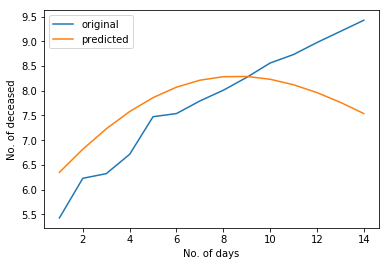

In [93]:
plt.plot(np.arange(1,predict_for_k_days+1),data_country[4][50:50+predict_for_k_days],label='original')
plt.plot(np.arange(1,predict_for_k_days+1),prediction_for_27_days,label='predicted')
plt.legend()
plt.xlabel('No. of days')
plt.ylabel('No. of deceased')
plt.show()

In [17]:
np.arange(1,train_for_k_days+1)

array([1, 2, 3, 4, 5, 6, 7])

In [32]:
np.sum(data_country[0][52:59])

72.36448477945919

In [33]:
72.36/7

10.337142857142856

In [71]:
c_values[0]

array([ 1.14942524e-07,  1.14942524e-07,  1.14942524e-07,  1.14942524e-07,
        8.99997075e-05,  9.99996750e-06,  1.29999578e-04,  9.99996324e-06,
        4.99998374e-05,  1.69635518e-04,  8.99030165e-05,  7.59172454e-05,
        4.98781589e-05,  1.14942524e-07,  1.14942524e-07,  1.14942524e-07,
        1.14942524e-07,  1.14942524e-07,  5.66666053e-05,  9.99996750e-06,
        9.99996750e-06,  4.99998375e-05,  4.99998375e-05,  9.99996750e-06,
        1.69999448e-04,  4.85949765e-05,  1.14942525e-07, -1.84614835e+01,
       -1.23076623e+01, -1.23076623e+01,  2.46154146e+01,  9.99996750e-06,
        9.99996750e-06,  8.99997069e-05,  8.99997061e-05,  4.99998372e-05,
        1.69923908e-04,  1.69999447e-04,  4.99989741e-05,  1.14942525e-07,
        1.14942525e-07,  1.14942525e-07,  1.14942525e-07,  1.14942525e-07,
        1.69999448e-04,  1.29999578e-04,  1.29999578e-04,  1.29999576e-04,
        4.99241896e-05,  8.96703835e-05,  6.10694754e-05,  8.34441703e-05,
        9.99996750e-06,  

In [65]:
meta_data[0]

array([0., 0., 0., 0., 0., 0., 0.])

In [66]:
sample_y

array([6.32192809, 6.71424552, 7.47573343, 7.53915881, 7.79441587,
       8.01122726, 8.27146303])

In [68]:
np.square(np.linalg.norm(sample_y-meta_data[0]))

391.123155076038

In [69]:
10000*np.exp(-100*np.square(np.linalg.norm(sample_y-meta_data[0])))

0.0

In [ ]:
temp = np.square(np.linalg.norm(x_i-x_j))
w_1*np.exp(-w_2*temp)